In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv("D:\\IT Vedant\\Data Sets\\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### To check the the missing values

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
b=df['total_bedrooms'].mean()
b

537.8705525375618

In [7]:
df['total_bedrooms'].fillna(b,inplace=True)

#### Where are majority of Houses located?

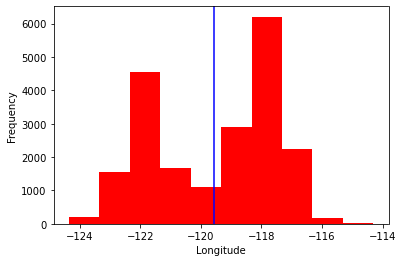

In [34]:
mean=df["longitude"].mean()
plt.hist(df["longitude"],color="r")
plt.xlabel("Longitude")
plt.ylabel("Frequency")
plt.axvline(mean,color="blue")


Text(0, 0.5, 'Frequency')

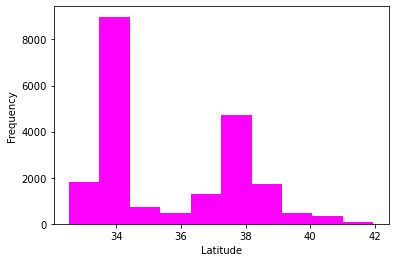

In [9]:
plt.hist(df["latitude"],color="magenta")
plt.xlabel("Latitude")
plt.ylabel("Frequency")

In [10]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

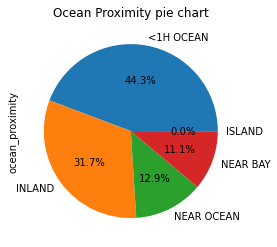

In [11]:
df["ocean_proximity"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Ocean Proximity pie chart")
plt.show()

#### Find the number of Households in each area

In [35]:
df.groupby('ocean_proximity').households.sum()

ocean_proximity
<1H OCEAN     4730118
INLAND        3127759
ISLAND           1383
NEAR BAY      1118931
NEAR OCEAN    1332308
Name: households, dtype: int64

#### What is the highest median_house_value

In [13]:
df['median_house_value'].max()

500001

In [14]:
HP=df[df['median_house_value']==df['median_house_value'].max()]
HP.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
89,-122.27,37.80,52,249,78.0,396,85,1.2434,NEAR BAY,500001
459,-122.25,37.87,52,609,236.0,1349,250,1.1696,NEAR BAY,500001
493,-122.24,37.86,52,1668,225.0,517,214,7.8521,NEAR BAY,500001
494,-122.24,37.85,52,3726,474.0,1366,496,9.3959,NEAR BAY,500001
509,-122.23,37.83,52,2990,379.0,947,361,7.8772,NEAR BAY,500001


#### Find the number of households where median value of House prices are highest

In [15]:
HP['households'].sum()

449664

#### Where are the High Priced Houses located?

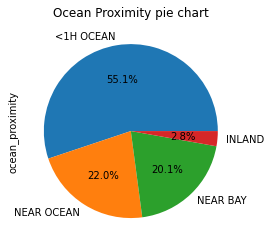

In [16]:
HP["ocean_proximity"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Ocean Proximity pie chart")
plt.show()

#### What is the Average income of people living in the areas where House Prices are highest

In [17]:
HP['median_income'].mean()

7.825123212435239

#### What is the average population in the areas where House Prices are highest?

In [18]:
HP['population'].sum()

1073860

In [19]:
LP=df[df['median_house_value']==df['median_house_value'].min()]
LP.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2521,-122.74,39.71,16,255,73.0,85,38,1.6607,INLAND,14999
2799,-117.02,36.40,19,619,239.0,490,164,2.1000,INLAND,14999
9188,-117.86,34.24,52,803,267.0,628,225,4.1932,INLAND,14999
19802,-123.17,40.31,36,98,28.0,18,8,0.5360,INLAND,14999


#### Find the number of Households where median value of House prices are lowest

In [20]:
LP['households'].sum()

435

#### Where are the Low Priced Houses Located?

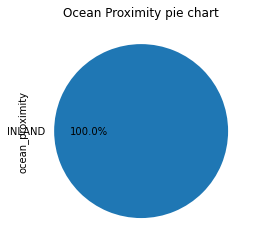

In [21]:
LP["ocean_proximity"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Ocean Proximity pie chart")
plt.show()

#### What is the average population in the areas where House Prices are lowest?

In [22]:
LP['population'].sum()

1221

#### What is the Average income of people living in locality where House Prices are the lowest?

In [23]:
LP['median_income'].mean()

2.122475

#### What are the income groups who own houses?

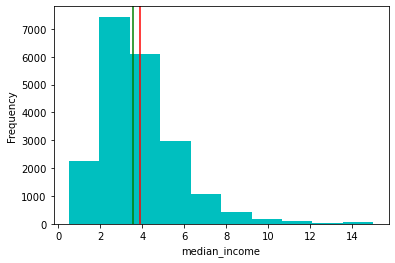

In [24]:
mean=df["median_income"].mean()
median=df["median_income"].median()
plt.hist(df["median_income"],color="c")
plt.xlabel("median_income")
plt.ylabel("Frequency")
plt.axvline(mean,color="r")
plt.axvline(median,color="green")

In [25]:
correlation= df.corr()
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

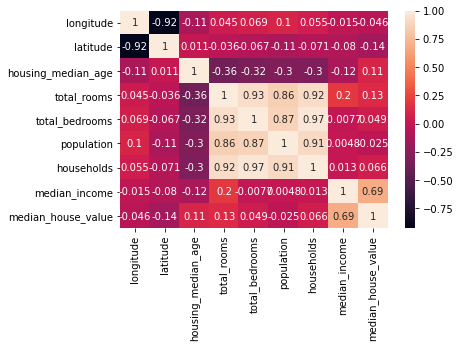

In [26]:
sn.heatmap(correlation,annot=True)

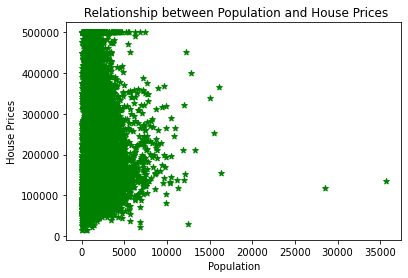

In [27]:
plt.scatter(x=df["population"],y=df["median_house_value"], color = "g", marker="*")
plt.xlabel("Population")
plt.ylabel("House Prices")
plt.title(" Relationship between Population and House Prices")
plt.show()

#### What is the relationship between  total number of bedrooms and House Prices

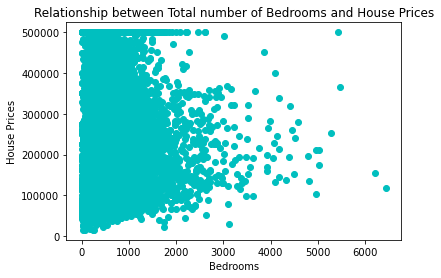

In [28]:
plt.scatter(x=df["total_bedrooms"],y=df["median_house_value"],color="c")
plt.title("Relationship between Total number of Bedrooms and House Prices")
plt.xlabel("Bedrooms")
plt.ylabel("House Prices")
plt.show()

#### What is the relationship between number of rooms and house value?

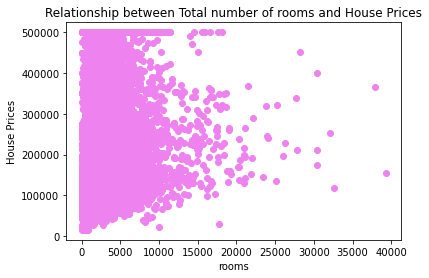

In [29]:
plt.scatter(x=df["total_rooms"],y=df["median_house_value"],color="violet")
plt.title("Relationship between Total number of rooms and House Prices")
plt.xlabel("rooms")
plt.ylabel("House Prices")
plt.show()

#### What is the relationship between age of a building and House Prices

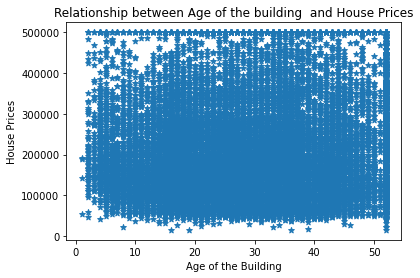

In [30]:
plt.scatter(x=df["housing_median_age"],y=df["median_house_value"],marker="*")
plt.title("Relationship between Age of the building  and House Prices")
plt.xlabel("Age of the Building")
plt.ylabel("House Prices")
plt.show()

#### What is the relationship between Number of rooms and House Prices

Text(0.5, 1.0, 'Relationship between Number of Households and House Prices')

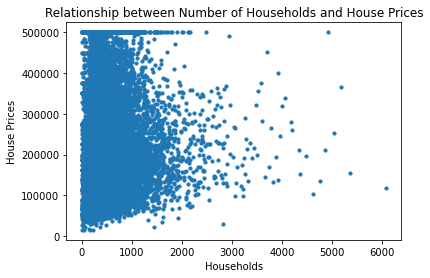

In [31]:
plt.scatter(x=df["households"],y=df["median_house_value"],s=10)
plt.xlabel("Households")
plt.ylabel("House Prices")
plt.title("Relationship between Number of Households and House Prices")